In [1]:
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn import model_selection
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import linear_model
from sklearn import ensemble

In [42]:
plt.rcParams.update({'font.size': 25})

In [2]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, scoring="r2", train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = model_selection.learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
price = joblib.load('final_etsy_price.pkl')
vectorized_features = joblib.load('final_etsy_vectorized_features.pkl')

In [4]:
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(price.reshape(-1,1))

In [5]:
quantile_price = quantile_transformer.transform(np.array(price).reshape(-1,1))

In [6]:
quantile_price = quantile_price.reshape(1,-1)[0]

In [17]:
start_time = time.time()
estimator = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=15, random_state=0, verbose=1)
cv = model_selection.ShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
train_sizes=[.1, .2, .3, .4]
scoring="r2"
n_jobs=-1
train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, vectorized_features, quantile_price, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes)
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'02:49:48'

In [18]:
joblib.dump([train_sizes, train_scores, test_scores] , 'learning_curve_results_prices.pkl')

['learning_curve_results_prices.pkl']

In [14]:
[train_sizes, train_scores, test_scores] = joblib.load('learning_curve_results_prices.pkl')

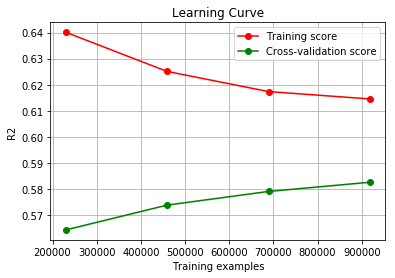

In [9]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('R2')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

In [10]:
start_time = time.time()
estimator = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=15, random_state=0, verbose=1)
cv = model_selection.ShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
train_sizes=[.0001, .001, .01, .05]
scoring="r2"
n_jobs=-1
train_sizes2, train_scores2, test_scores2 = model_selection.learning_curve(estimator, vectorized_features, quantile_price, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes)
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'00:03:29'

In [36]:
all_train_sizes = np.concatenate((train_sizes2,train_sizes))

In [37]:
all_train_scores = np.concatenate((train_scores2,train_scores))

In [38]:
all_test_scores = np.concatenate((test_scores2,test_scores))

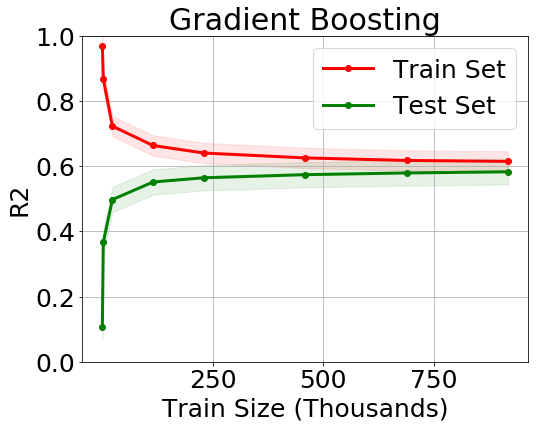

In [88]:
plt.figure(figsize=(8,6))
plt.title('Gradient Boosting')
plt.xlabel('Train Size (Thousands)')
plt.ylabel('R2')
plt.ylim(0.0,1.0)
plt.xticks([250000, 500000, 750000], [250, 500, 750])
train_scores_mean = np.mean(all_train_scores, axis=1)
train_scores_std = np.std(all_train_scores, axis=0) / 4
test_scores_mean = np.mean(all_test_scores, axis=1)
test_scores_std = np.std(all_test_scores, axis=0) / 4
plt.grid()

plt.fill_between(all_train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(all_train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(all_train_sizes, train_scores_mean, 'o-', color="r",
         label="Train Set", linewidth=3)
plt.plot(all_train_sizes, test_scores_mean, 'o-', color="g",
         label="Test Set", linewidth=3)

plt.savefig('Gradient Boosting Regression Validation',bbox_inches='tight')
plt.legend(loc="best")

In [82]:
start_time = time.time()
estimator = linear_model.LinearRegression()
cv = model_selection.ShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
train_sizes=[.0001, .001, .01, .05, .1, .2, .3, .4]
scoring="r2"
n_jobs=-1
train_sizes3, train_scores3, test_scores3 = model_selection.learning_curve(estimator, vectorized_features, quantile_price, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes)
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'00:01:43'

In [84]:
train_sizes3 = train_sizes3[2:]
train_scores3 = train_scores3[2:]
test_scores3 = test_scores3[2:]

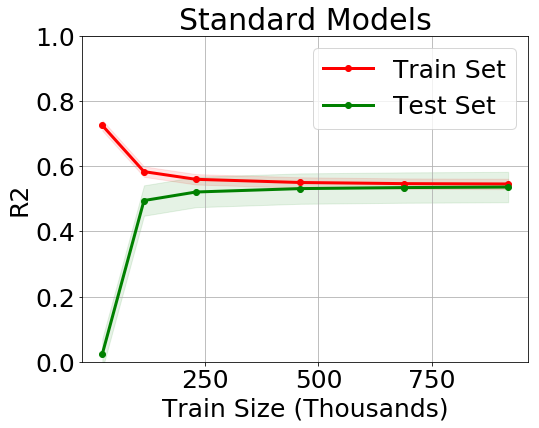

In [87]:
plt.figure(figsize=(8,6))
plt.title('Standard Models')
plt.xlabel('Train Size (Thousands)')
plt.ylabel('R2')
plt.ylim(0.0, 1.0)
plt.xticks([250000, 500000, 750000], [250, 500, 750])
train_scores_mean = np.mean(train_scores3, axis=1)
train_scores_std = np.std(train_scores3, axis=0) / 4
test_scores_mean = np.mean(test_scores3, axis=1)
test_scores_std = np.std(test_scores3, axis=0) / 4
plt.grid()

plt.fill_between(train_sizes3, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes3, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes3, train_scores_mean, 'o-', color="r",
         label="Train Set", linewidth=3)
plt.plot(train_sizes3, test_scores_mean, 'o-', color="g",
         label="Test Set", linewidth=3)

plt.savefig('Standard Regression Validation',bbox_inches='tight')
plt.legend(loc="best")